In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier

In [2]:
#read train set
train = pd.read_csv('train.csv')
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
train.shape

(217, 2603)

In [3]:
#read test set
test = pd.read_csv('test.csv')
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
test.shape

(55, 2603)

In [4]:
# read feature name variable
f = open('label_stat.pkl','rb')
label_stat = pickle.load(f)

In [5]:
X_train = X_train.loc[:,label_stat]
X_train.shape

(217, 11)

In [6]:
#define model (parameter)
boost = AdaBoostClassifier(random_state=3)

In [7]:
#fitting model
boost.fit(X_train, y_train)
importances = boost.feature_importances_

In [8]:
#cek label value
X_train.columns.values

array(['ATSC2m', 'AATSC0v', 'SM1_Dzs', 'n6Ring', 'AATS1dv', 'AATS2dv',
       'C1SP2.1', 'C2SP2.1', 'SaasC.1', 'SMR_VSA5', 'SRW07'], dtype=object)

In [9]:
#make label dataframe
tmp = {"label":X_train.columns.values, "importances":importances }
df_importance = pd.DataFrame(tmp)
df_importance.sort_values(by="importances",ascending=False, inplace=True)

In [10]:
df_importance

,label,importances
2,SM1_Dzs,0.26
4,AATS1dv,0.14
7,C2SP2.1,0.12
1,AATSC0v,0.10
0,ATSC2m,0.08
5,AATS2dv,0.08
6,C1SP2.1,0.06
9,SMR_VSA5,0.06
3,n6Ring,0.04
8,SaasC.1,0.04


In [11]:
deskriptor = ['SM1_Dzs','AATS1dv','C2SP2.1','AATSC0v','AATS2dv','ATSC2m','C1SP2.1']
rank = [0.26, 0.14, 0.12, 0.10, 0.08, 0.08, 0.06]
df = pd.DataFrame({'deskriptor': deskriptor, 'importance':rank})

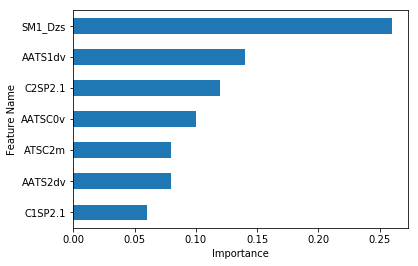

In [13]:
#plot feature importance dataframe
df.sort_values(by='importance',inplace=True)
df.plot.barh(x='deskriptor', y='importance', legend=None)
plt.xlabel('Importance')
plt.ylabel('Feature Name')
#plt.savefig('Feature Importance AB2.png', dpi=1000, bbox_inches = 'tight')